<a href="https://colab.research.google.com/github/Priy-Sharma/Predictive-Maintenance-of-milling-machine/blob/main/Predicitve_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive maintenance for milling machine**

In [ ]:
# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
maintenance_path = '/content/drive/MyDrive/maintenance_project/predictive_maintenance.csv'

In [ ]:
# importing the necessary libraries for data manipulation graph visualization and
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read the csv(comma separated value) file
df = pd.read_csv(maintenance_path)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
# Shape of dataframe
df.shape

(10000, 10)

In [ ]:
# Information of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


<ul>

<li> From the info(), it seems like all the features have the correct data types. However, for cross-verification, we will run the code to check the unique values. </li>
</ul>

In [ ]:
for col in df.columns:
  print(df[col].unique())
  print("-"*10)

[    1     2     3 ...  9998  9999 10000]
----------
['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']
----------
['M' 'L' 'H']
----------
[298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5]
----------
[308.6 308.7 308.5 309.  308.9 309.1 309.2 309.3 309.4 309.5 308.8 308.4
 308.3 308.2 308.1 308.  307.9 309.6 309.7 309.8 309.9 310.  310.1 310.2
 307.8 307.7 307.6 307.5 307.4 307.3 307.2 307.1 307.  306.9 306.8 306.7
 306.6 306.5 306.4 306.3 306.2 306.1 306.  305.9 305.8 3

In [ ]:
# Check NULL/ NAN values
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [ ]:
# Check duplicate values
df.duplicated().sum()

0

In [ ]:
# Value count for target column
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

<ul>
<li> The data seems to be unbalnced. We will balance the data for the model building using oversampling.</li>
</ul>

# EDA (Exploratory Data Analysis)

In [ ]:
# Necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Describe numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


<b> Obeservations: </b>
<ul>
<li> For the "Process Temperature [K], mean and median(50%) are somewhat close indicating that the distribution is nearly symmetric with a standard deviation of 1.48. </li>

 <li>The Standard deviation for "Rotational speed [rpm] is more than other features indiacting that the distribution is right skewed. </li>

 <li>Mean and median for the "Tool Wear [min]" is the same indicating that the distribution is symmetric. For 75% of the data tool wear [min] falls in the range 0 minute to 165 minute.</li>
 </ul>

In [ ]:
# Describe object type columns
df.describe(include = ["O"]).T

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000
Failure Type,10000,6,No Failure,9652


<b> Observations: </b>
<ul> <li>Type 'L' is most frequently occuring type with 6000 entries.

 Data has 10000 records out of those 9652 records having "No Failure" as Failure type. </li> </ul>

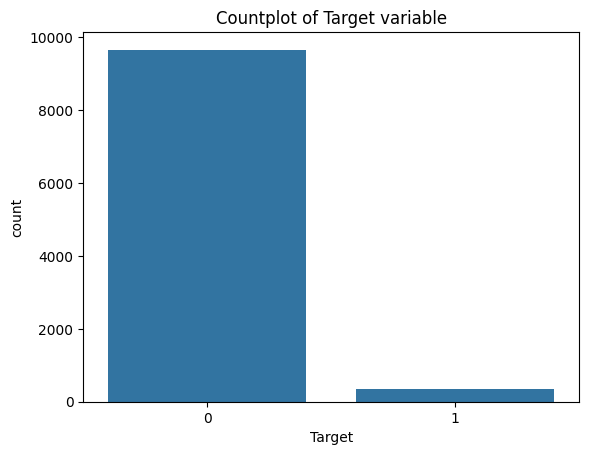

In [ ]:
# Distibution of data
plt.title("Countplot of Target variable")
sns.countplot(df, x = 'Target')
plt.show()

<b> Observations </b>
<ul>
<li>From the bar plot it is clear that the data is highly imbalanced for it's target column. </li>
</ul>

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

# Outlier Detection

Text(0.5, 1.0, 'Histplot for Air temperature [K]')

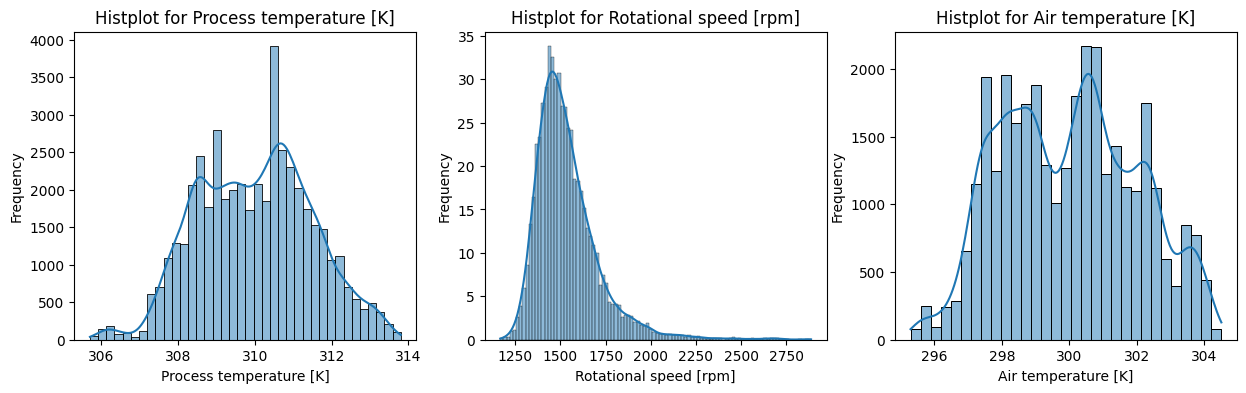

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot(1,3,1)
sns.histplot(df, x = 'Process temperature [K]', stat='frequency', kde = True)
plt.title("Histplot for Process temperature [K]")

plt.subplot(1,3,2)
sns.histplot(df, x = 'Rotational speed [rpm]', stat='frequency', kde = True)
plt.title("Histplot for Rotational speed [rpm]")

plt.subplot(1,3,3)
sns.histplot(df, x = 'Air temperature [K]', stat='frequency', kde = True)
plt.title("Histplot for Air temperature [K]")

<b> Observations:</b>
<ul>
<li>A histogram is an important plot for detecting outliers and understanding the skewness of the data.</li>

<li>From the plot, it shows that the rotational speed has a right-skewed distribution, indicating that there are some outliers in this column.</li>
</ul>

# Distributuion of columns based on Failure type.
The dataset contains 10,000 rows, out of which 6,000 rows show 'No Failure' in the 'Failure Type' column. We will plot the sns.FacetGrid by removing these records to obtain a clearer representation of the distribution of other failure types.

In [ ]:
df_filtered = df[df['Failure Type'] != 'No Failure']

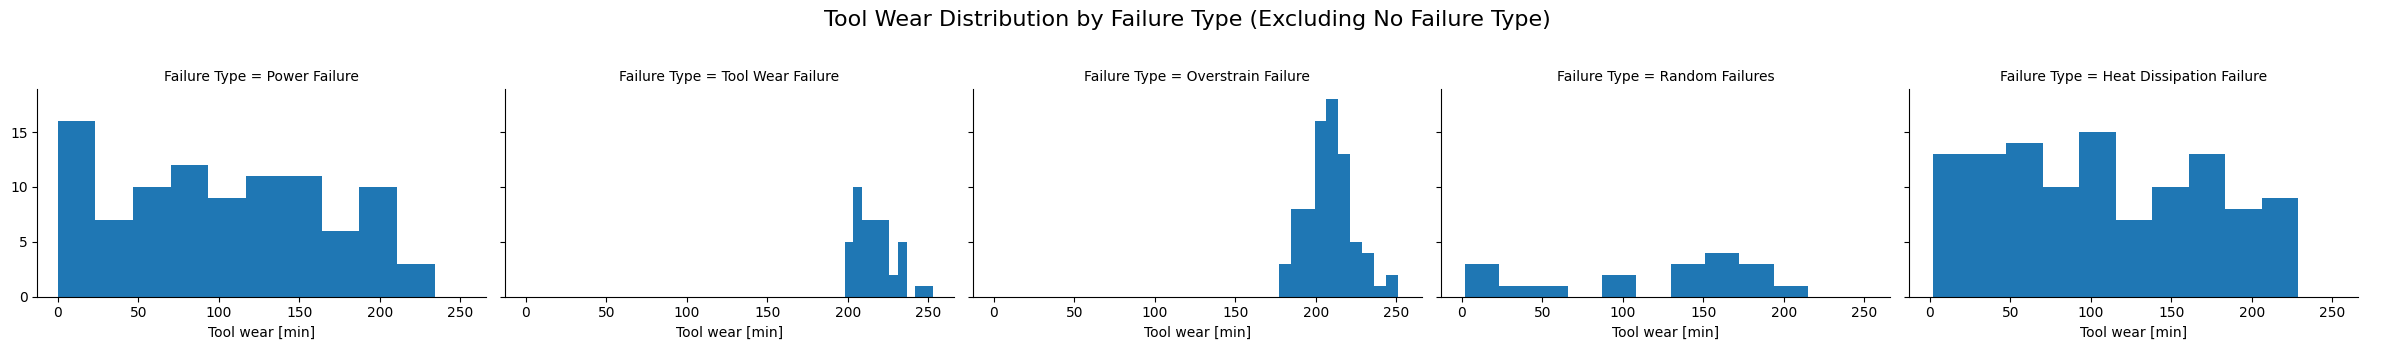

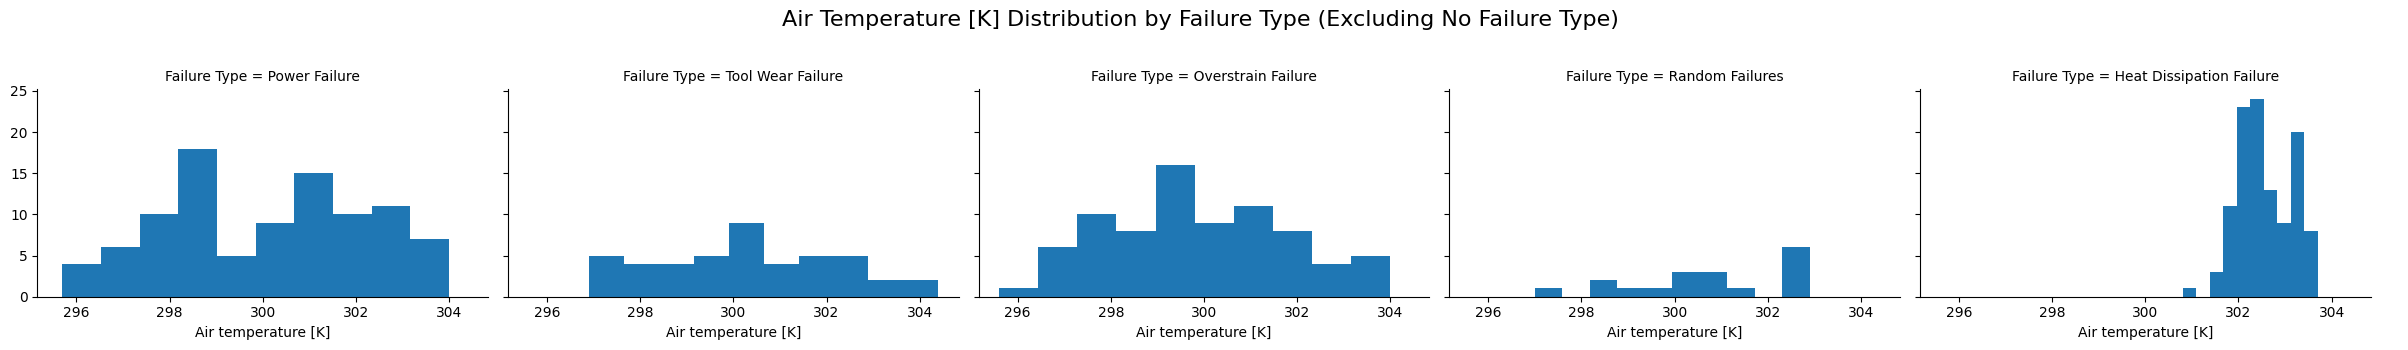

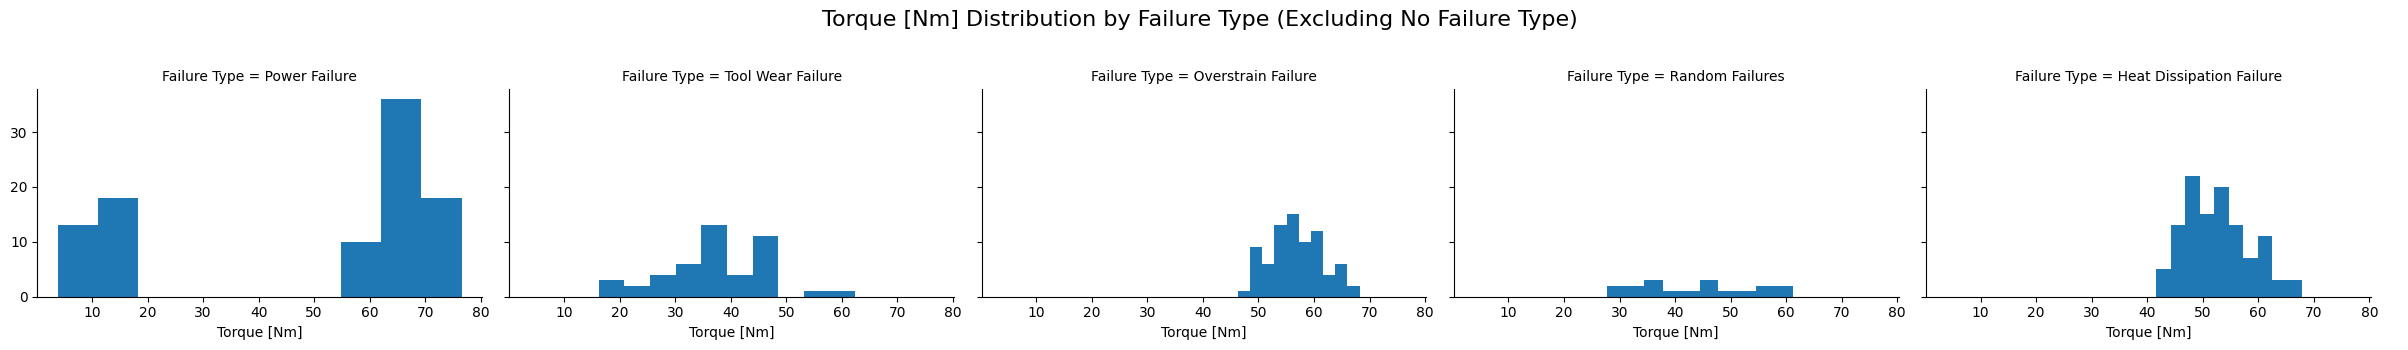

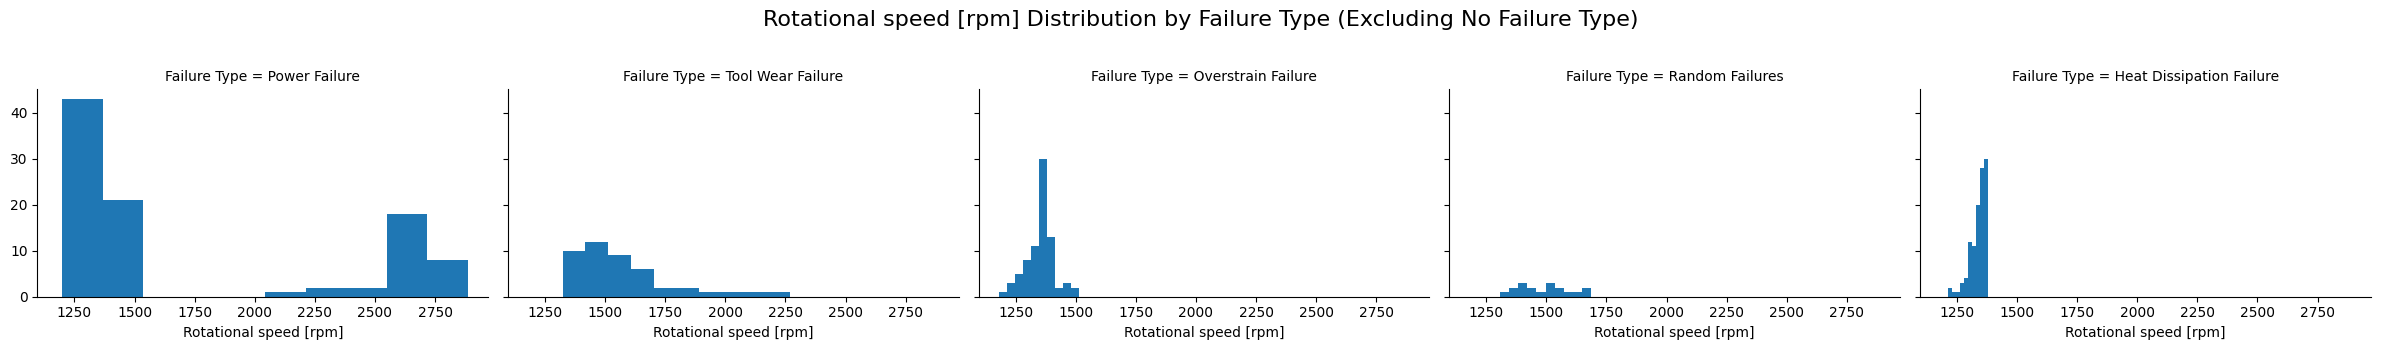

In [ ]:

grid = sns.FacetGrid(df_filtered, col='Failure Type', aspect=1.6)
grid.map(plt.hist, "Tool wear [min]")
grid.add_legend()
grid.fig.suptitle("Tool Wear Distribution by Failure Type (Excluding No Failure Type)", y=1.15, fontsize =16)


grid = sns.FacetGrid(df_filtered, col='Failure Type', aspect=1.6)
grid.map(plt.hist, "Air temperature [K]")
grid.add_legend()
grid.fig.suptitle("Air Temperature [K] Distribution by Failure Type (Excluding No Failure Type)", y=1.15, fontsize =16)


grid = sns.FacetGrid(df_filtered, col='Failure Type', aspect=1.6)
grid.map(plt.hist, "Torque [Nm]")
grid.add_legend()
grid.fig.suptitle("Torque [Nm] Distribution by Failure Type (Excluding No Failure Type)", y=1.15, fontsize =16)


grid = sns.FacetGrid(df_filtered, col='Failure Type', aspect=1.6)
grid.map(plt.hist, "Rotational speed [rpm]")
grid.add_legend()
grid.fig.suptitle("Rotational speed [rpm] Distribution by Failure Type (Excluding No Failure Type)", y=1.15, fontsize =16)

plt.show()

<b> Observations: </b>

<li> <b>Tool Wear Distribution by Failure Type (Excluding No Failure Type):</b>
<p>From the second and third graphs in the first row, it's clear that  when tool wear exceeds 200 minutes there is a tool wear failure, and more than 15 time the overstrain failure is the result when tool wear is 210 to 220 minutes. However, there is no clear relationship between power failure, random failure, and heat dissipation failure with tool wear (in minutes).
</p></li>

<li><b>Air Temperature [K] Distribution by Failure Type (Excluding No Failure Type)</b>
<p>From the fifth graph it is clear that the when the air temperature exceeds the 301 kelvin there is high probability of heat dissipation failure to occur. </p></li>

<li><b>Torque [Nm] Distribution by Failure Type (Excluding No Failure Type)</b>
<p>From the graphs, it is clear that if the torque is less than 20 Nm or more than 55 Nm, power failure occurs. The graph shows the highest peak for power failure when the torque is 60 Nm. There is also a probability of overstrain failure if the torque exceeds 50 Nm. The last graph shows that if the torque exceeds 40 Nm, there is a chance of heat dissipation failure.</p></li>

<li><b>Rotational speed [rpm] Distribution by Failure Type (Excluding No Failure Type)</b>
<p> Minimum or higher rotational speeds indicate a probability of power failure. From the third graph, it is clear that the more than 30 times overstrain failure occurred when the rotational speed was between 1350 to 1400 rpm. </p></li>

<b>These conclusions are drawn from the sns.FacetGrid graphs
</b>







# Box plot

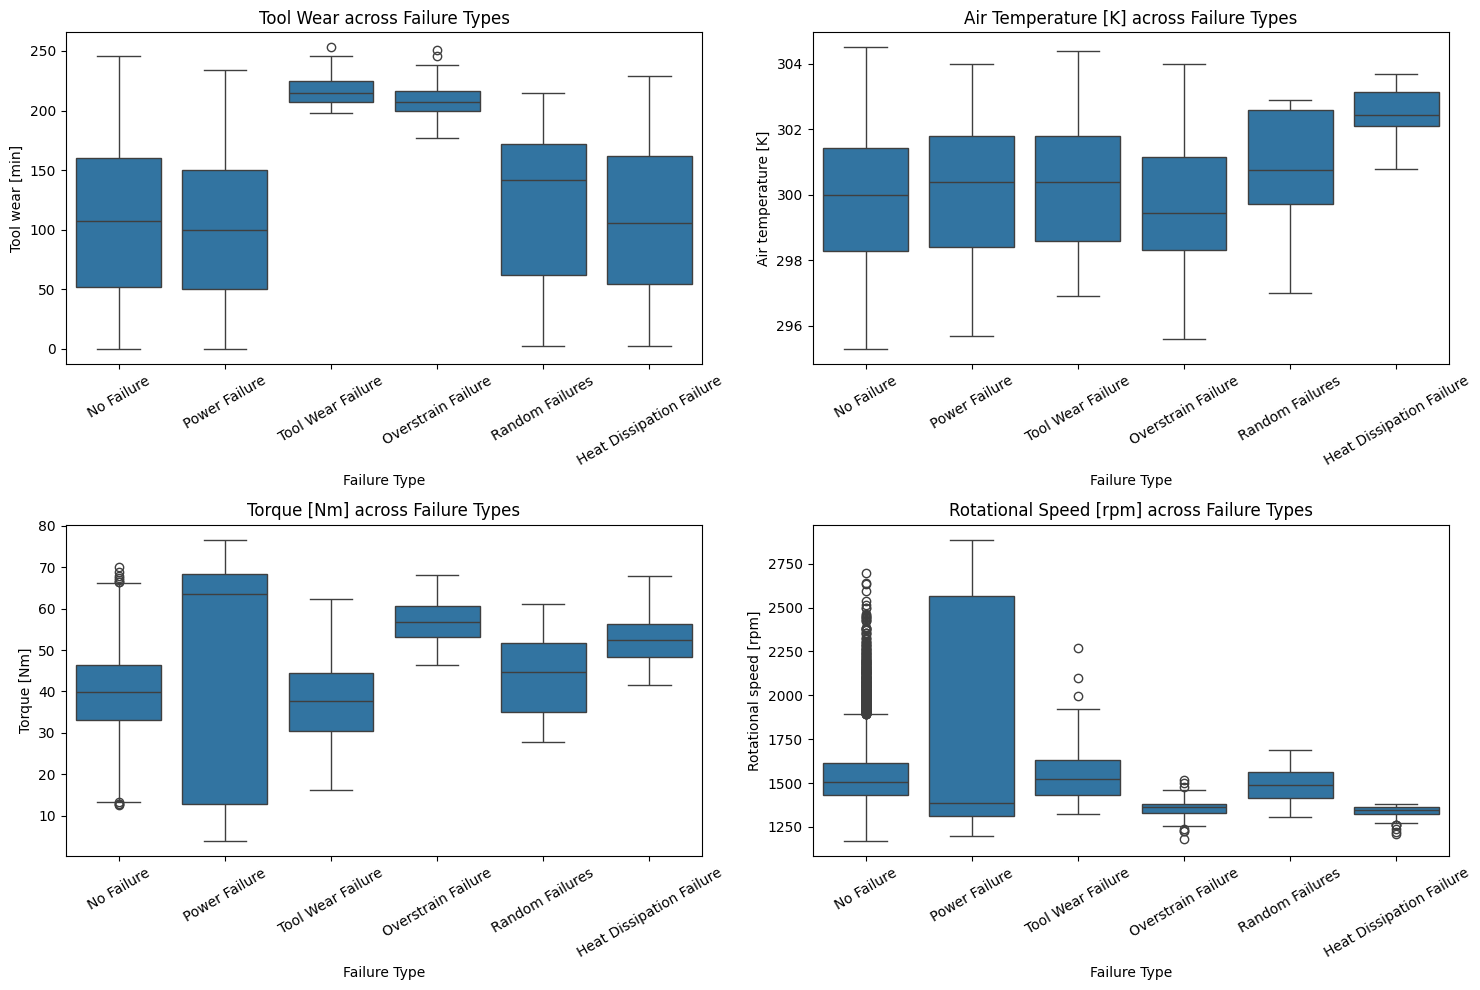

In [ ]:
# Create a 2x2 grid of plots
plt.figure(figsize=(15, 10))

# First plot (top-left)
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Failure Type', y='Tool wear [min]')
plt.title('Tool Wear across Failure Types')
plt.xticks(rotation=30)

# Second plot (top-right)
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Failure Type', y='Air temperature [K]')
plt.title('Air Temperature [K] across Failure Types')
plt.xticks(rotation=30)

# Third plot (bottom-left)
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Failure Type', y='Torque [Nm]')
plt.title('Torque [Nm] across Failure Types')
plt.xticks(rotation=30)

# Fourth plot (bottom-right)
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Failure Type', y='Rotational speed [rpm]')
plt.title('Rotational Speed [rpm] across Failure Types')
plt.xticks(rotation=30)

# Display all plots
plt.tight_layout()
plt.show()


## Correlation Analysis

In [ ]:
df1 = df.copy()

In [ ]:
obj_list = list(df1.select_dtypes("object"))

In [ ]:
obj_list

['Product ID', 'Type', 'Failure Type']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in obj_list:
  le = LabelEncoder()
  df1[col] = le.fit_transform(df1[col])

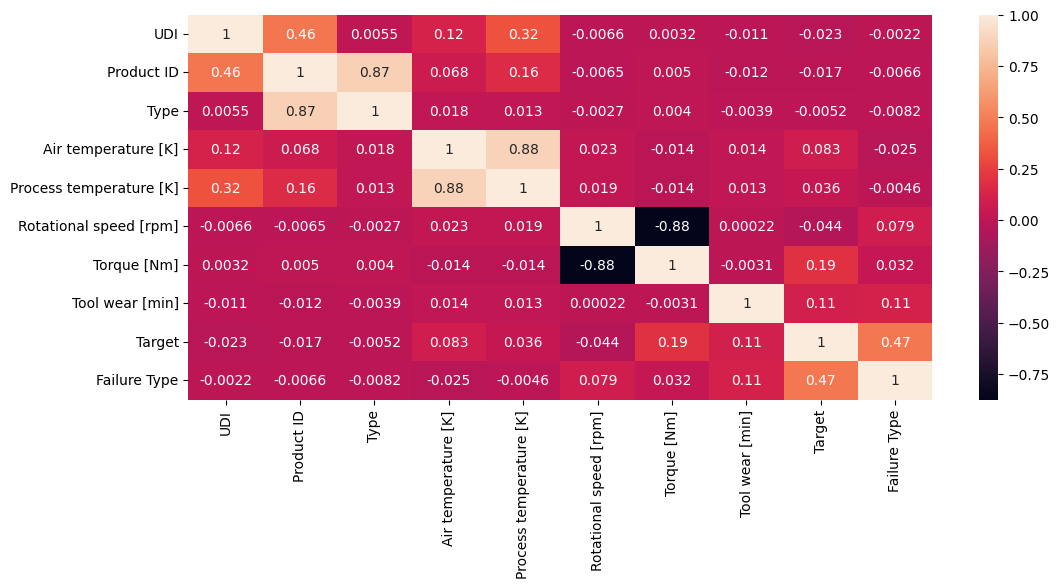

In [ ]:
plt.figure(figsize = (12,5))
sns.heatmap(df1.corr(), annot = True)
plt.show()

<b> Target is output feature while the remaining columns are input features. </b>
<ul>
<li>From the above correlation graph it is clear that there is the very weak correlation of Failure Type with UDI, Product ID, Type, and Process temperature. </li>
<li> The features Product Id, Type and Process Temperature, Air temperature has very high correlations. </li>
<li> Rotational Speed and Torquec also has strong negative correaltion.
</ul>


In [ ]:
# The output column Target is having very minimum correlation with 'UDI', 'Product_ID', 'Type' therefore we will drop these columns

df1.drop(columns = ['UDI', 'Product ID', 'Type', 'Failure Type'], inplace =True)

# Scatterplot between the features

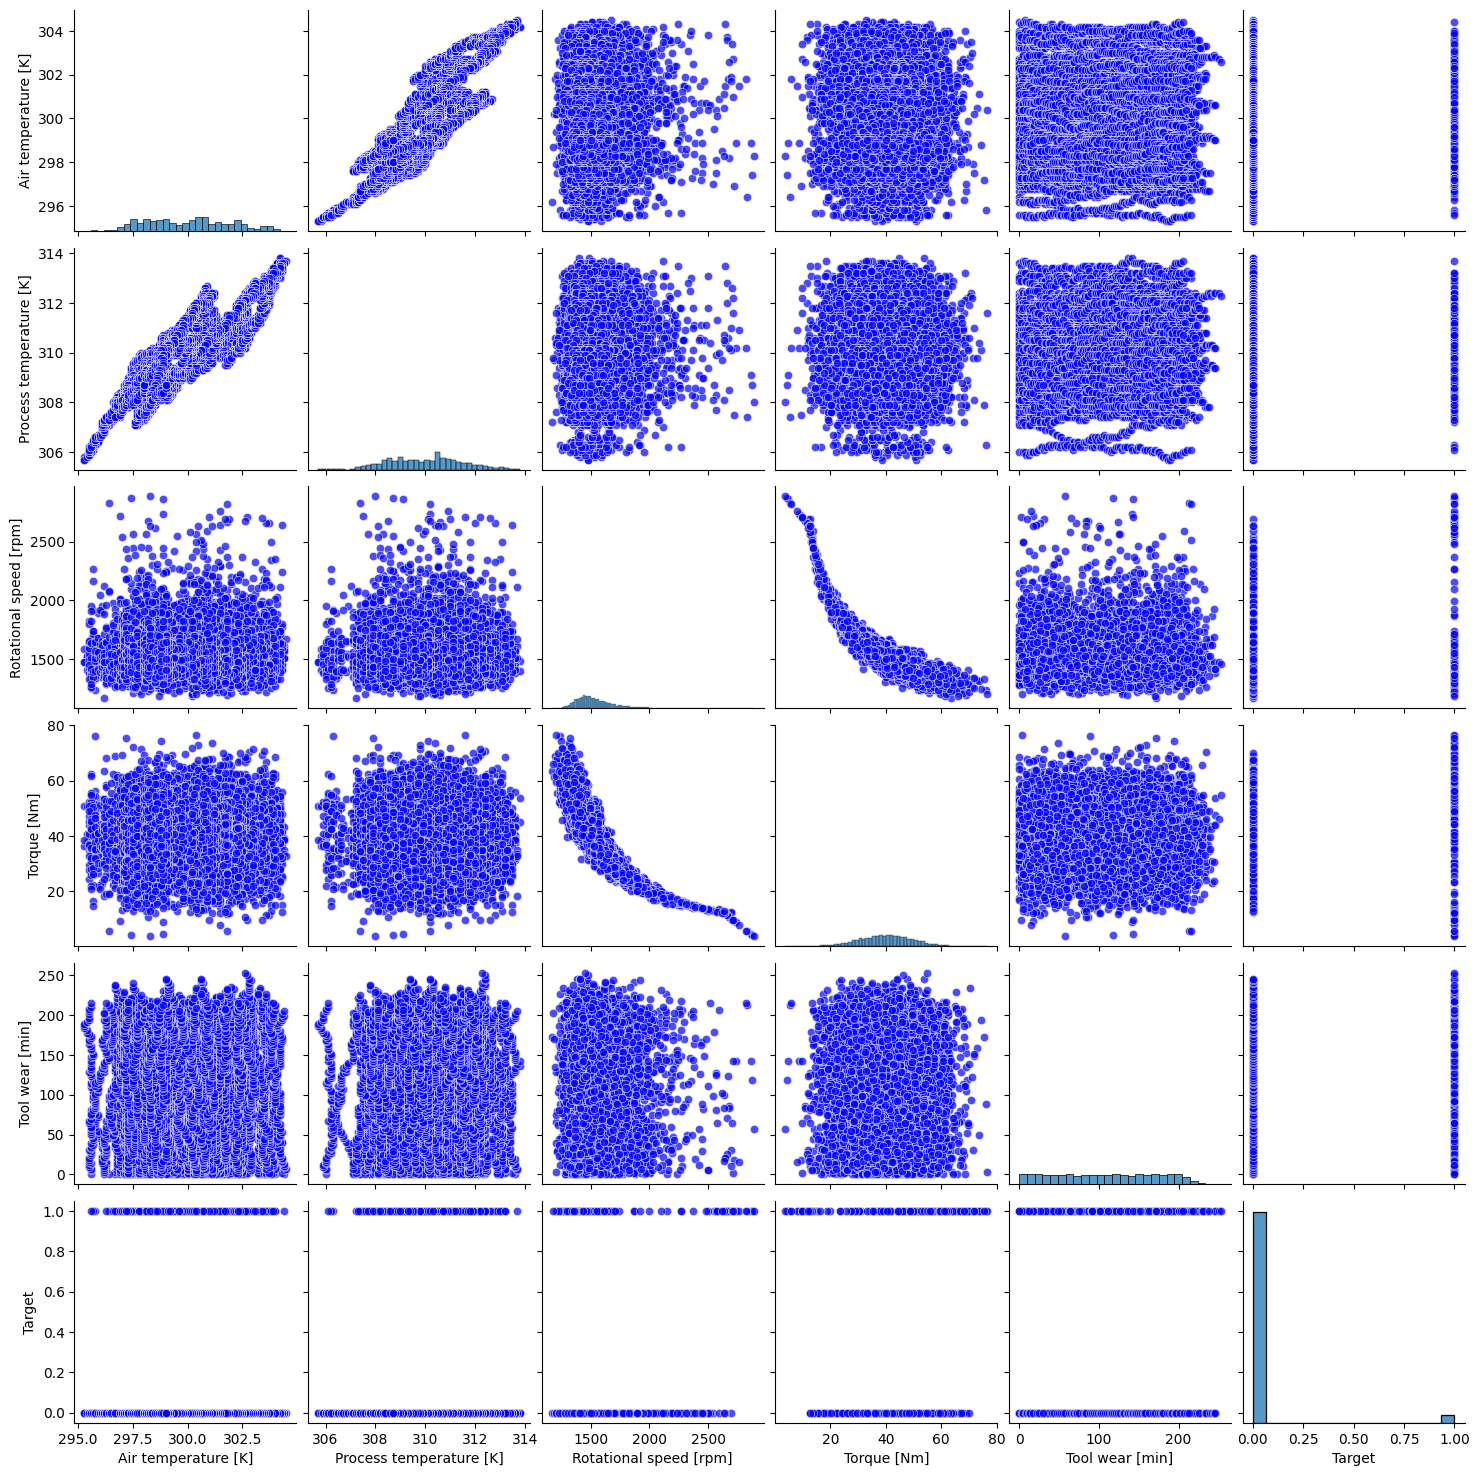

In [ ]:
sns.pairplot(df1, plot_kws={'alpha': 0.7, 'color': 'blue'})

<b> Observations: </b>
<ul>
<li> By observing the scatter plot of the target feature with other input features it is clear that the problem is the classification problem with two classes 0 and 1. </li> </ul>

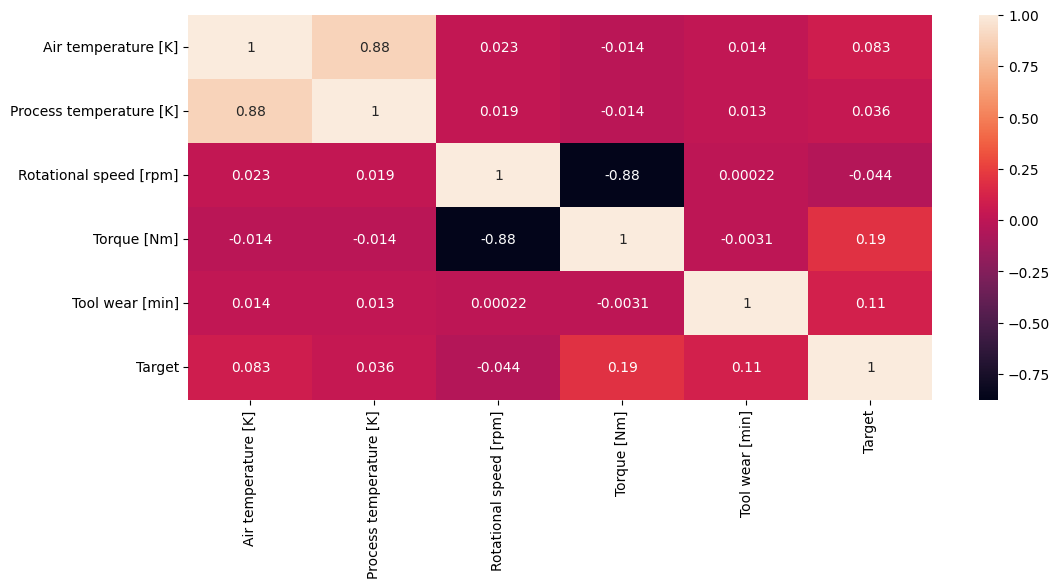

In [ ]:
plt.figure(figsize = (12,5))
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [ ]:
df3 = df1.copy()

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
mm = MinMaxScaler()

mm_list = ['Air temperature [K]', 'Torque [Nm]', 'Tool wear [min]','Rotational speed [rpm]', 'Process temperature [K]']

for i in mm_list:
  df3[i] = mm.fit_transform(df3[[i]])

In [ ]:
df3.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,0.304348,0.358025,0.222934,0.535714,0.000000,0
1,0.315217,0.370370,0.139697,0.583791,0.011858,0
2,0.304348,0.345679,0.192084,0.626374,0.019763,0
3,0.315217,0.358025,0.154249,0.490385,0.027668,0
4,0.315217,0.370370,0.139697,0.497253,0.035573,0


In [ ]:
# Shuffle the data
df3 = df3.sample(frac =1)

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import time

In [ ]:
lr = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [ ]:
X = df3.drop(columns = ['Target'])
y = df3['Target']



In [ ]:
counter = Counter(y)
print('Before', counter)
# Oversampling the train dataset using SMOTE - Synthetic Minority Oversampling Technique
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X, y)
counter = Counter(y_sm)
print('After', counter)

Before Counter({0: 9661, 1: 339})
After Counter({0: 9661, 1: 9661})


In [ ]:
# Perform the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state =42)

In [ ]:
X_train.shape

(15457, 5)

In [ ]:
y_train.shape

(15457,)

In [ ]:
def plot_confusion(y_test, test_predict):
  cf = confusion_matrix(y_test, test_predict)
  plt.figure(figsize=(5, 5))
  sns.heatmap(cf, annot=True, fmt='d', cmap="YlGnBu")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

In [ ]:
df_errors = pd.DataFrame({'Algorithms': ['Logistic Regression', 'Decision Tree Classifier', 'Prunned Decision Tree classifier', 'Random forest classifier', 'Gradient boosting Classifier',"Support Vector Classifier" ]})

In [ ]:
train_accuracy_list = []
test_accuracy_list = []
roc_auc_list = []

# Logistic Regression

In [ ]:
model_lr = lr.fit(X_train, y_train)

In [ ]:
train_pred = model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)

classification report for training data is:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      7709
           1       0.83      0.83      0.83      7748

    accuracy                           0.83     15457
   macro avg       0.83      0.83      0.83     15457
weighted avg       0.83      0.83      0.83     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1952
           1       0.82      0.84      0.83      1913

    accuracy                           0.83      3865
   macro avg       0.83      0.83      0.83      3865
weighted avg       0.83      0.83      0.83      3865

--------------------
Test ROC AUC score: 0.9066203628323894
--------------------


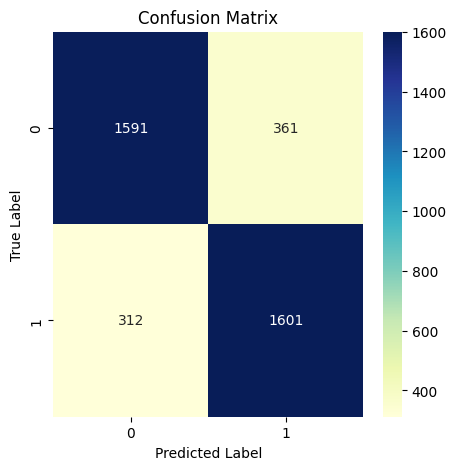

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = model_lr.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)



# Decision Tree Classifier

In [ ]:
model_tree = tree.fit(X_train, y_train)

In [ ]:
train_pred = model_tree.predict(X_train)
test_pred = model_tree.predict(X_test)

classification report for training data is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7709
           1       1.00      1.00      1.00      7748

    accuracy                           1.00     15457
   macro avg       1.00      1.00      1.00     15457
weighted avg       1.00      1.00      1.00     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1952
           1       0.96      0.98      0.97      1913

    accuracy                           0.97      3865
   macro avg       0.97      0.97      0.97      3865
weighted avg       0.97      0.97      0.97      3865

--------------------
Test ROC AUC score: 0.9708412244093476
--------------------


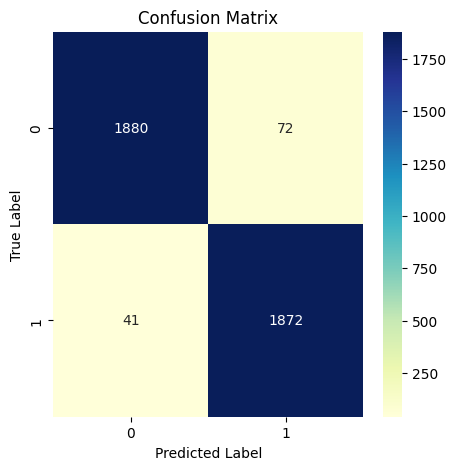

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = model_tree.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)

## GridSearchCV on Decision Tree Classifier

In [ ]:
params = {'max_depth': [12,15, 20, None],
          'min_samples_leaf': [2, 1]}

In [ ]:
tree_prun = DecisionTreeClassifier()

In [ ]:
hcv = GridSearchCV(tree_prun, param_grid = params, scoring = 'roc_auc')
hcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [12, 15, 20, None],
                         'min_samples_leaf': [2, 1]},
             scoring='roc_auc')

In [ ]:
hcv.best_score_

0.9753768187384695

In [ ]:
hcv.best_params_

{'max_depth': 12, 'min_samples_leaf': 2}

## Implementation of best hyperparameters on decision tree classifier

In [ ]:
tree1 = DecisionTreeClassifier(max_depth= 12, min_samples_leaf= 2)
tree1 = tree1.fit(X_train, y_train)

In [ ]:
train_pred = tree1.predict(X_train)
test_pred = tree1.predict(X_test)

classification report for training data is:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7709
           1       0.99      0.98      0.99      7748

    accuracy                           0.99     15457
   macro avg       0.99      0.99      0.99     15457
weighted avg       0.99      0.99      0.99     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1952
           1       0.96      0.97      0.97      1913

    accuracy                           0.97      3865
   macro avg       0.97      0.97      0.97      3865
weighted avg       0.97      0.97      0.97      3865

--------------------
Test ROC AUC score: 0.9801487664212934
--------------------


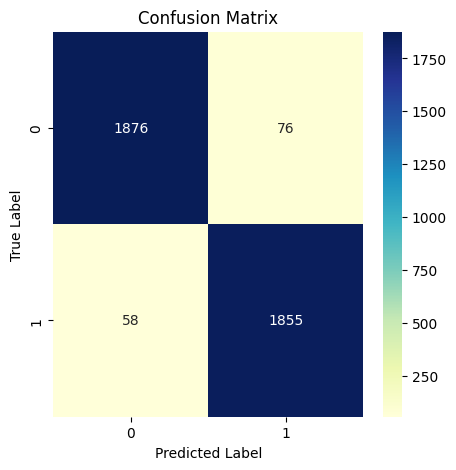

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = tree1.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)

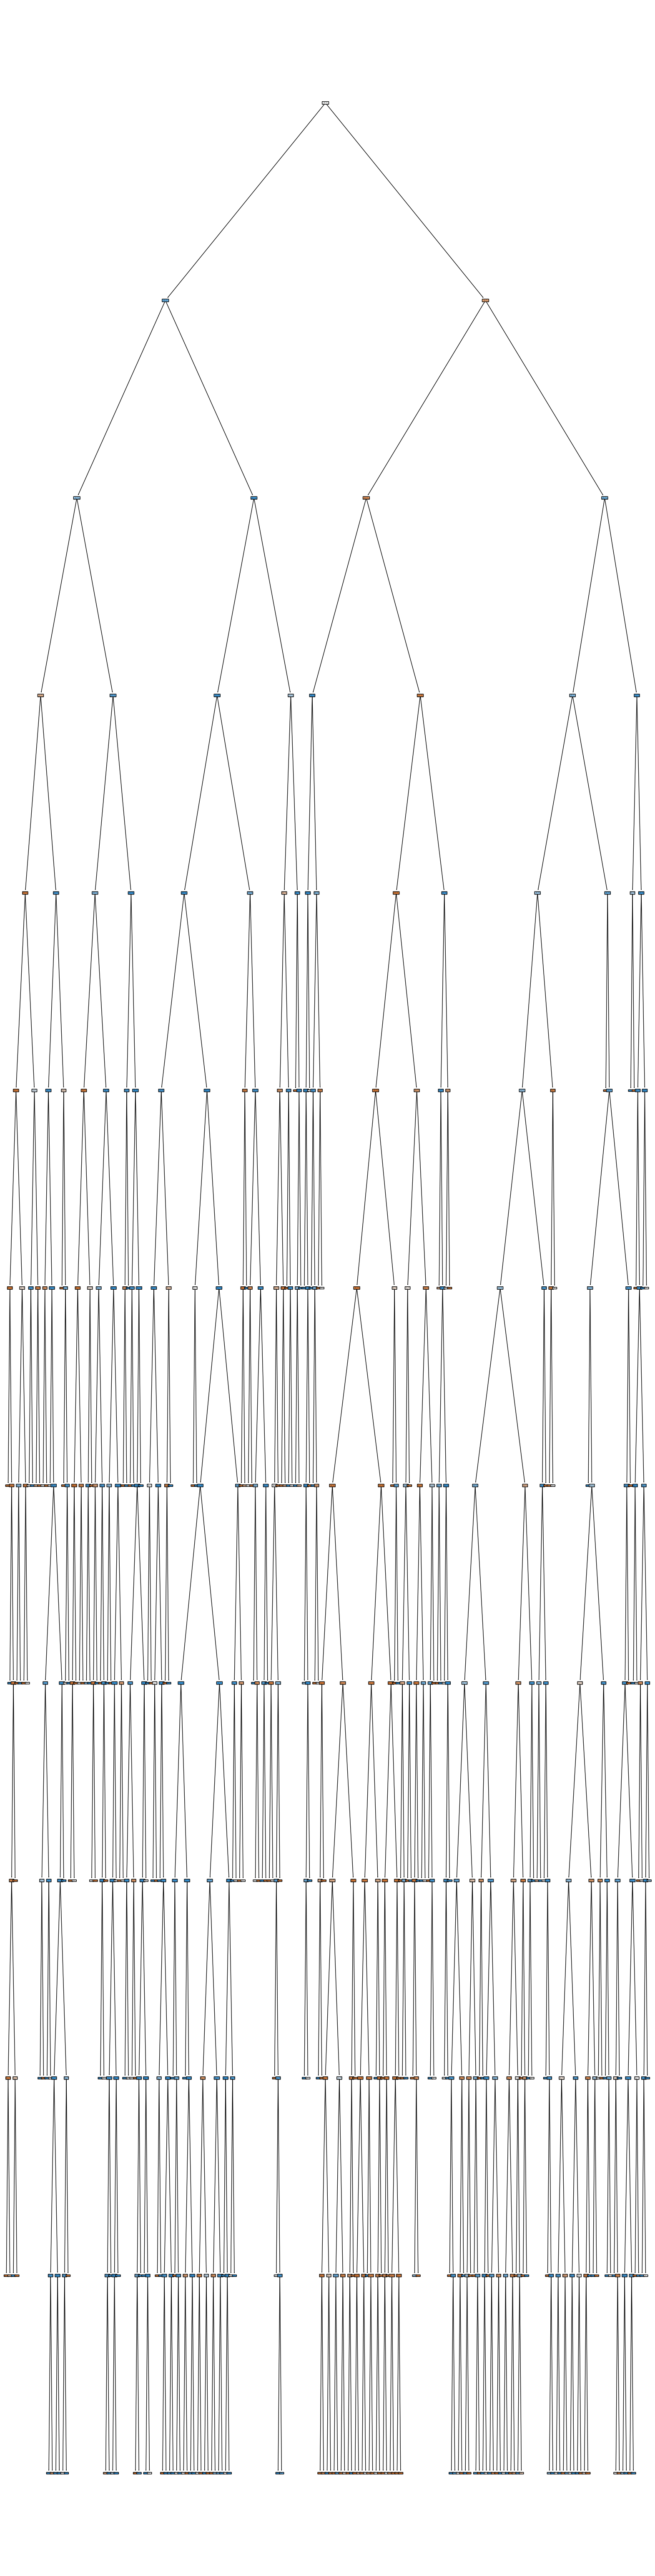

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 80))
plot_tree(tree1, filled=True, rounded=True)
plt.show()


In [ ]:
from sklearn.tree import export_text
print(export_text(tree1, feature_names = list(X_train.columns)))

|--- Rotational speed [rpm] <= 0.14
|   |--- Air temperature [K] <= 0.68
|   |   |--- Torque [Nm] <= 0.68
|   |   |   |--- Tool wear [min] <= 0.82
|   |   |   |   |--- Air temperature [K] <= 0.68
|   |   |   |   |   |--- Tool wear [min] <= 0.80
|   |   |   |   |   |   |--- Air temperature [K] <= 0.62
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Air temperature [K] >  0.62
|   |   |   |   |   |   |   |--- Air temperature [K] <= 0.63
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Air temperature [K] >  0.63
|   |   |   |   |   |   |   |   |--- Process temperature [K] <= 0.60
|   |   |   |   |   |   |   |   |   |--- Rotational speed [rpm] <= 0.13
|   |   |   |   |   |   |   |   |   |   |--- Air temperature [K] <= 0.67
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Air temperature [K] >  0.67
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   

## Bar Chart representing the feature importance in decision tree

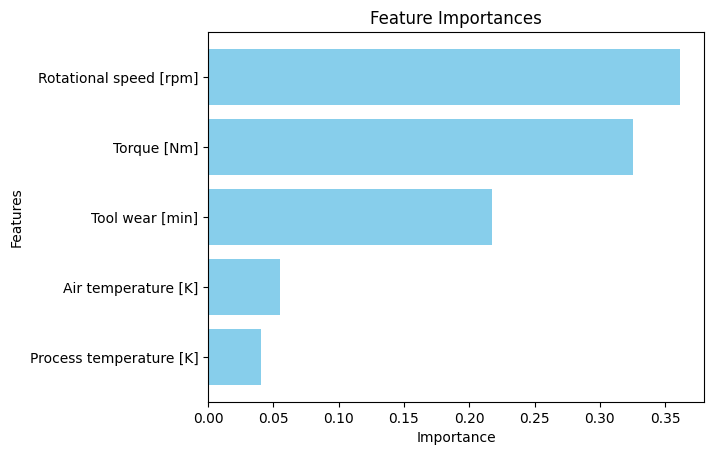

In [ ]:
importance_df = pd.DataFrame({"Features": X_train.columns, "Importance": tree1.feature_importances_})
importance_df.sort_values("Importance", ascending = True, inplace = True)
plt.barh(importance_df['Features'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(oob_score = True)
model_rf =  rf.fit(X_train, y_train)
train_pred = model_rf.predict(X_train)
test_pred = model_rf.predict(X_test)
oob_score = rf.oob_score_
print(f"Out-of-bag score: {oob_score}")

Out-of-bag score: 0.9807854046710228


classification report for training data is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7709
           1       1.00      1.00      1.00      7748

    accuracy                           1.00     15457
   macro avg       1.00      1.00      1.00     15457
weighted avg       1.00      1.00      1.00     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1952
           1       0.97      0.99      0.98      1913

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865

--------------------
Test ROC AUC score: 0.998527921554849
--------------------


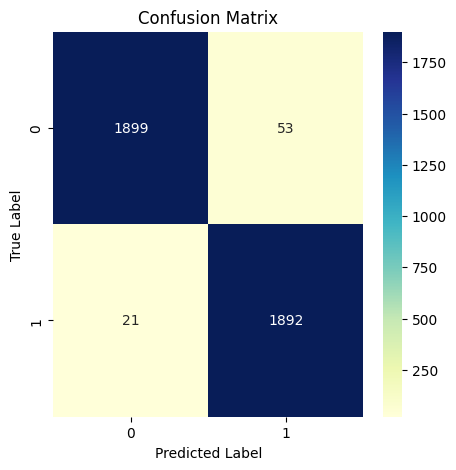

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = model_rf.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)

## Gradient Boosting Classifier

In [ ]:
model_gb =  gb.fit(X_train, y_train)
train_pred = model_gb.predict(X_train)
test_pred = model_gb.predict(X_test)

classification report for training data is:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      7709
           1       0.94      0.97      0.96      7748

    accuracy                           0.96     15457
   macro avg       0.96      0.96      0.96     15457
weighted avg       0.96      0.96      0.96     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      1952
           1       0.92      0.97      0.95      1913

    accuracy                           0.95      3865
   macro avg       0.95      0.95      0.95      3865
weighted avg       0.95      0.95      0.95      3865

--------------------
Test ROC AUC score: 0.9894315372387374
--------------------


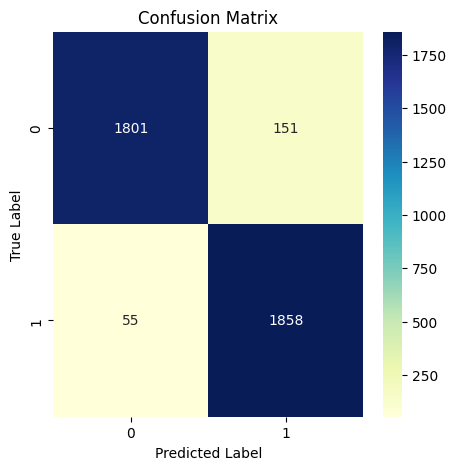

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = model_gb.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)

# Support Vector Machine

In [ ]:
svc = SVC(probability = True)
model_svc =  svc.fit(X_train, y_train)
train_pred = model_svc.predict(X_train)
test_pred = model_svc.predict(X_test)

classification report for training data is:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      7709
           1       0.92      0.97      0.94      7748

    accuracy                           0.94     15457
   macro avg       0.94      0.94      0.94     15457
weighted avg       0.94      0.94      0.94     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1952
           1       0.91      0.97      0.94      1913

    accuracy                           0.94      3865
   macro avg       0.94      0.94      0.94      3865
weighted avg       0.94      0.94      0.94      3865

--------------------
Test ROC AUC score: 0.9780553996383673
--------------------


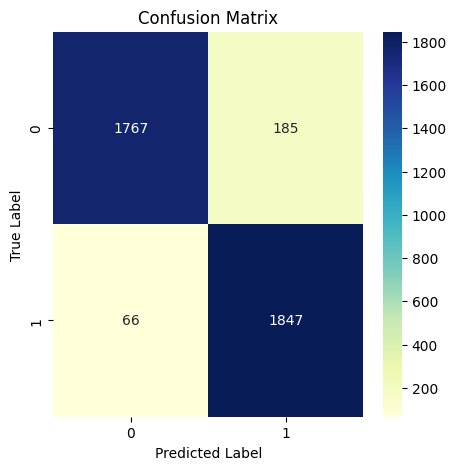

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = model_svc.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)

## Error Analysis

In [ ]:
df_errors['train_accuracy'] = train_accuracy_list
df_errors['test_accuracy'] = test_accuracy_list
df_errors['roc_auc'] = roc_auc_list

In [ ]:
df_errors

,Algorithms,train_accuracy,test_accuracy,roc_auc
0,Logistic Regression,0.827716,0.825873,0.906620
1,Decision Tree Classifier,1.000000,0.970763,0.970841
2,Prunned Decision Tree classifier,0.985638,0.965330,0.980149
3,Random forest classifier,1.000000,0.980854,0.998528
4,Gradient boosting Classifier,0.956266,0.946701,0.989432
5,Support Vector Classifier,0.939251,0.935058,0.978055


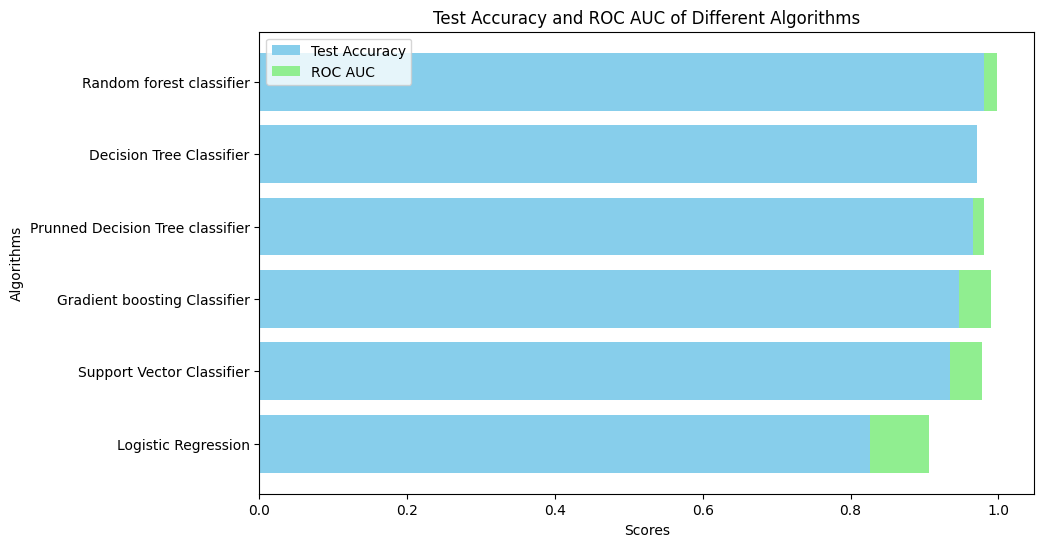

In [ ]:
# Plotting the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_errors.sort_values("test_accuracy", ascending = True, inplace = True)

# Plotting test accuracy
ax.barh(df_errors['Algorithms'], df_errors['test_accuracy'], color='skyblue', label='Test Accuracy')

# Plotting ROC AUC on top of the test accuracy bars
ax.barh(df_errors['Algorithms'], df_errors['roc_auc'] - df_errors['test_accuracy'],
        left=df_errors['test_accuracy'], color='lightgreen', label='ROC AUC')

# Adding labels and title
ax.set_xlabel('Scores')
ax.set_ylabel('Algorithms')
ax.set_title('Test Accuracy and ROC AUC of Different Algorithms')
ax.legend()

plt.show()

<b> Observations: </b>
<ul>
    <li>The accuracy of the Random Forest classifier is higher than that of any other algorithm.</li>
    <li>In the case of imbalanced data, it is best to consider the ROC AUC score, which is also high for the Random Forest classifier and the Gradient Boosting classifier.</li>
    <li>The accuracy and ROC AUC score achieved by Logistic Regression are poorer compared to the other models.</li>
</ul>






